DATA PREPROCESSING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\okechukwu chude\Documents\Neural Network\breast-cancer-detection\breast-cancer.csv")

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


DATA EXPLORATION

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

DEALING WITH MISSING VALUES

In [6]:
data.isnull().values.any()

False

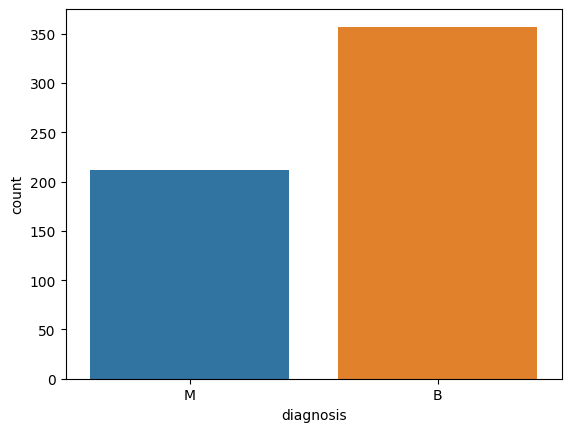

In [7]:
sns.countplot(x='diagnosis', data=data)
plt.show()

ENCODING CATEGORICAL VARIABLE

In [8]:
#one hot encoding
data = pd.get_dummies(data=data, drop_first=True)
# Convert True/False values to 1/0
boolean_columns = data.select_dtypes(include=bool).columns
data[boolean_columns] = data[boolean_columns].astype(int)

In [9]:
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


CHECKING DISTRIBUTION OF TARGET VARIABLE

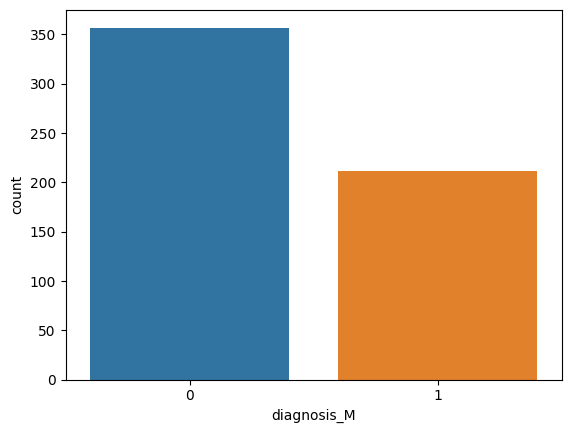

In [10]:
sns.countplot(x='diagnosis_M', data=data)
plt.show()

In [11]:
ind_data= data.drop(columns = 'diagnosis_M')

In [12]:
ind_data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


CORRELATION matrix and heatmap

<Axes: title={'center': 'corrolation with disnosis'}>

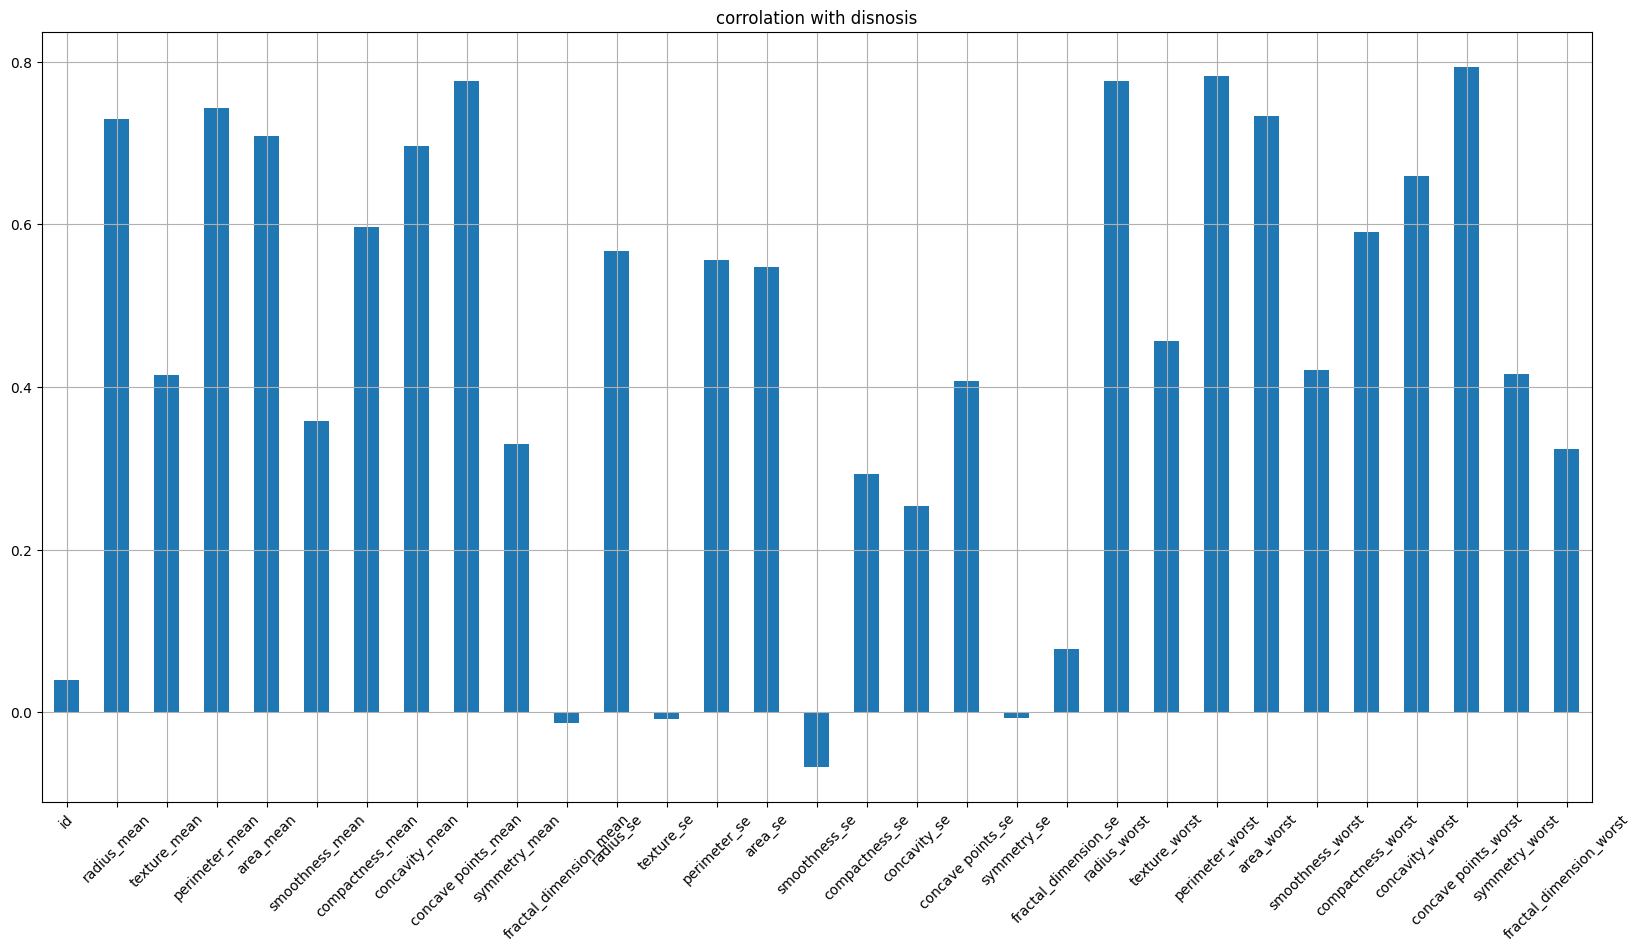

In [13]:
ind_data.corrwith(data['diagnosis_M']).plot.bar(
    figsize = (20,10), title=  'corrolation with disnosis', rot= 45, grid =2
)

#corrolation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

SPLITTING THE DATA

In [14]:
#matris of independent variables
x = data.iloc[:, 1:-1].values  #data.iloc[: (all rows), 1:-1 columns from 1 excluding last].values
# target variable
y = data.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.3,random_state=42)

FEATURE SCALING

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [17]:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

BUILDING THE MODEL

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(Xtrain, Ytrain) 

LogisticRegression(random_state=0)

In [19]:
ypred = lr.predict(Xtest)

In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [21]:
acc = accuracy_score(Ytest, ypred)
f1 = f1_score(Ytest, ypred)
prec = precision_score(Ytest, ypred)
rec = recall_score(Ytest, ypred)

In [22]:
results = pd.DataFrame([['logistic regression', acc, f1, prec, rec]],
                      columns = ['Model', 'Acc','F1', 'Prec', 'Rec'])
results

,Model,Acc,F1,Prec,Rec
0,logistic regression,0.982456,0.976378,0.96875,0.984127


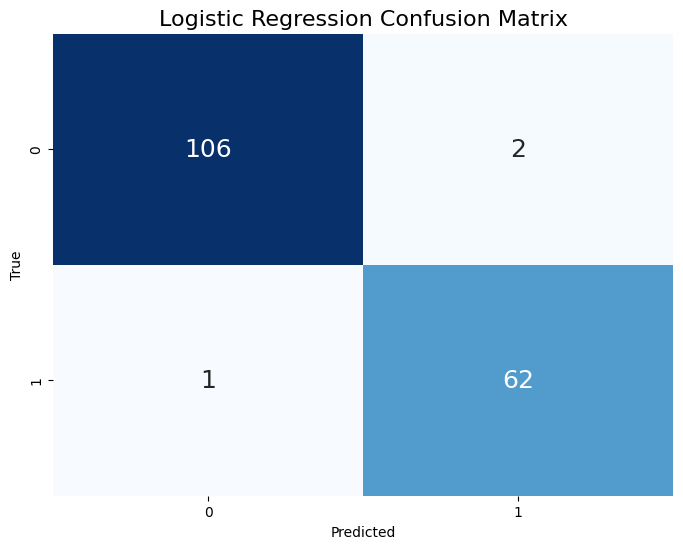

In [23]:
# Create the confusion matrix
cm_linreg = confusion_matrix(Ytest, ypred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linreg, annot=True, fmt="d", cmap="Blues", cbar=False,annot_kws={"fontsize": 18})
plt.title("Logistic Regression Confusion Matrix", fontdict={"fontsize": 16})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [24]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator= lr, X= Xtrain, y= Ytrain, cv= 10)

In [25]:
print('Accuracy is {:.2f} %'.format(accuracy.mean()*100))
print('Standard dev is {:.2f} %'.format(accuracy.std()*100))


Accuracy is 97.47 %
Standard dev is 2.28 %


RANDOM FOREST

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
ran_fr = RandomForestClassifier(random_state=0)
ran_fr.fit(Xtrain, Ytrain)

RandomForestClassifier(random_state=0)

In [28]:
rf_pred = ran_fr.predict(Xtest)

In [29]:
rf_acc = accuracy_score(Ytest, rf_pred)
rf_f1 = f1_score(Ytest, rf_pred)
rf_prec = precision_score(Ytest, rf_pred)
rf_rec = recall_score(Ytest, rf_pred)

In [30]:
rf_results = pd.DataFrame([['randon forest', rf_acc, rf_f1, rf_prec, rf_rec]],
                         columns = ['Model', 'Acc','F1', 'Prec', 'Rec'])
rf_results

,Model,Acc,F1,Prec,Rec
0,randon forest,0.97076,0.95935,0.983333,0.936508


In [31]:
print(type(results))
print(type(rf_results))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [32]:
print(type(results))

<class 'pandas.core.frame.DataFrame'>


In [33]:
results = pd.concat([results, rf_results], ignore_index=True)
print(results)

                 Model       Acc        F1      Prec       Rec
0  logistic regression  0.982456  0.976378  0.968750  0.984127
1        randon forest  0.970760  0.959350  0.983333  0.936508


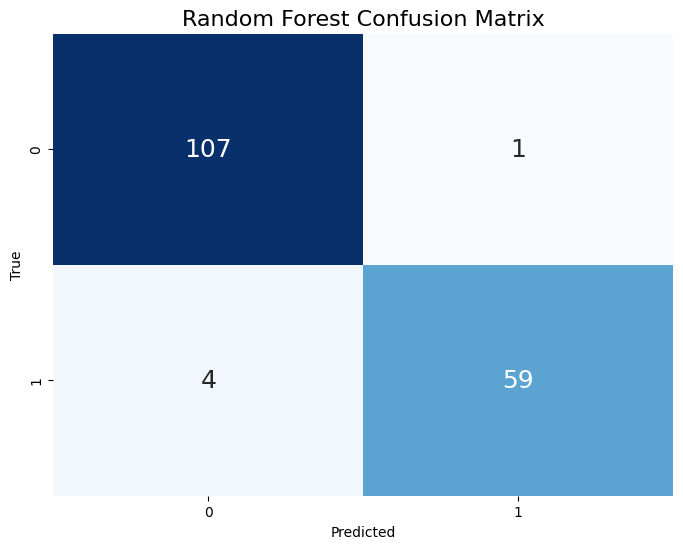

In [34]:
# Create the confusion matrix
cm_rf = confusion_matrix(Ytest, rf_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,annot_kws={"fontsize": 18})
plt.title("Random Forest Confusion Matrix", fontdict={"fontsize": 16})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Hyperparameter tuning

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
parameters = {'penalty': ['11','12', 'elasticnet', 'none'],
              'C':[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
             }

In [ ]:
random_search = 